# 多层感知机的从零开始实现
:label:`sec_mlp_scratch`

我们已经在数学上描述了多层感知机（MLP），现在让我们尝试自己实现一个多层感知机。为了与我们之前使用softmax回归（ :numref:`sec_softmax_scratch` ）获得的结果进行比较，我们将继续使用Fashion-MNIST图像分类数据集（ :numref:`sec_fashion_mnist`）。


In [1]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 初始化模型参数

回想一下，Fashion-MNIST中的每个图像由$28 \times 28 = 784$个灰度像素值组成。所有图像共分为10个类别。忽略像素之间的空间结构，我们可以将每个图像视为具有784个输入特征和10个类的简单分类数据集。首先，我们将实现一个具有1个隐藏层的多层感知机，其中包含256个隐藏单元。注意，我们可以将这两个量都视为超参数。通常，我们选择2的幂次方作为层的宽度。因为内存在硬件中的分配和寻址方式，这么做往往可以在计算上更高效。

我们用几个张量来表示我们的参数。注意，对于每一层我们都要记录一个权重矩阵和一个偏置向量。跟以前一样，我们要为这些参数的损失的梯度分配内存。


In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = tf.Variable(
    tf.random.normal(shape=(num_inputs, num_hiddens), mean=0, stddev=0.01))
b1 = tf.Variable(tf.zeros(num_hiddens))
W2 = tf.Variable(
    tf.random.normal(shape=(num_hiddens, num_outputs), mean=0, stddev=0.01))
b2 = tf.Variable(tf.random.normal([num_outputs], stddev=.01))

params = [W1, b1, W2, b2]

## 激活函数

为了确保我们知道一切是如何工作的，我们将使用最大值函数自己实现ReLU激活函数，而不是直接调用内置的`relu`函数。


In [4]:
def relu(X):
    return tf.math.maximum(X, 0)

## 模型

因为我们忽略了空间结构，所以我们使用`reshape`将每个二维图像转换为一个长度为`num_inputs`的向量。我们只需几行代码就可以实现我们的模型。


In [5]:
def net(X):
    X = tf.reshape(X, (-1, num_inputs))
    H = relu(tf.matmul(X, W1) + b1)
    return tf.matmul(H, W2) + b2

## 损失函数

为了确保数值稳定性，同时由于我们已经从零实现过softmax函数（ :numref:`sec_softmax_scratch` ），因此在这里我们直接使用高级API中的内置函数来计算softmax和交叉熵损失。回想一下我们之前在 :numref:`subsec_softmax-implementation-revisited` 中对这些复杂问题的讨论。我们鼓励感兴趣的读者查看损失函数的源代码，以加深对实现细节的了解。


In [6]:
def loss(y_hat, y):
    return tf.losses.sparse_categorical_crossentropy(y, y_hat,
                                                     from_logits=True)

## 训练

幸运的是，多层感知机的训练过程实现与softmax回归的训练过程实现完全相同。可以直接调用`d2l`包的`train_ch3`函数（参见 :numref:`sec_softmax_scratch` ），将迭代周期数设置为10，并将学习率设置为0.1.


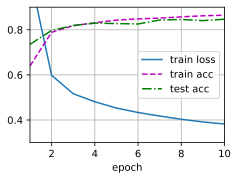

In [7]:
num_epochs, lr = 10, 0.1
updater = d2l.Updater([W1, W2, b1, b2], lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

为了对学习到的模型进行评估，我们将在一些测试数据上应用这个模型。


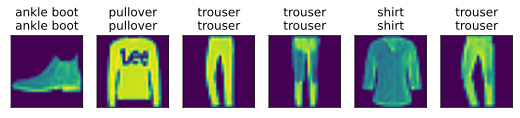

In [8]:
d2l.predict_ch3(net, test_iter)

## 小结

* 我们看到即使手动实现一个简单的多层感知机也是很容易的。
* 然而，如果有大量的层，从零开始实现多层感知机会变得很麻烦（例如，要命名和记录模型的参数）。

## 练习

1. 在所有其他参数保持不变的情况下，更改超参数`num_hiddens`的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。
1. 尝试添加更多的隐藏层，并查看它对结果有何影响。
1. 改变学习速率会如何影响结果？保持模型结构和其他超参数(包括迭代周期数)不变，学习率设置为多少会带来最好的结果？
1. 通过对所有超参数(学习率、迭代周期数、隐藏层数、每层的隐藏单元数)进行联合优化，可以得到的最佳结果是什么？
1. 描述为什么涉及多个超参数更具挑战性。
1. 如果要构建多个超参数的搜索方法，你能想到的最聪明的策略是什么？


[Discussions](https://discuss.d2l.ai/t/1798)
